# Elena's graphics

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [45]:
df = pd.read_csv("data_consumo_agua.csv")

In [3]:
df.shape

(71102, 17)

In [4]:
df.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


Recuerda las características de tus variables:
- Son 71102 observaciones

Sobre consumo, existen diferentes tipos de uso:

1. Doméstico: Uso habitacional
2. No Doméstico: Uso no doméstico
3. Mixto: uso doméstico y no doméstico

Las variables que miden dicho uso son: 

- consumo_total
- comsumo_prom
- consumo_total_mixto
- consumo_prom_mixto
- consumo_prom_dom
- consumo_total_dom
- consumo_prom_no_dom
- consumo_total_no_dom


Las otras variables: 

- anio: que tiene un solo valor 2019
- nomgeo: que contiene la misma información que alcaldía por lo que usaremos la variable alcaldia.
- gid: quién sabe qué es
- latitud: son únicas por colonia?
- longitud: igual que la de arriba
- **alcaldia:** las 16 alcaldías de la CDMX, donde el top 3 son Iztapalapa, Gustavo A. Madero y Cuauhtémoc.
- **colonia:** que son 1340 colonias registradas, donde el top 3 son Centro, Agricola Oriental y Roma Norte. 
- **bimestre:** solo se tienen tres bimestres
- **indice_des:** Diferencía territorialmente a la población de la CDMX de acuerdo a su nivel de desarrollo económico, agregando la información por colonia, los niveles son: 
        * POPULAR: Niveles de desarrollo más bajos de la Ciudad. 
        * BAJO: Niveles de desarrollo bajo de la Ciudad.
        * MEDIO: Niveles de desarrollo medio de la Ciudad.
        * ALTO: Niveles de desarrollo altos de la Ciudad. 

In [142]:
# Seleccionando solo variables de interes y reordenarlas
df = df[['consumo_total', 'consumo_total_dom', 'consumo_total_no_dom', 'consumo_total_mixto',
         'consumo_prom', 'consumo_prom_dom', 'consumo_prom_no_dom', 'consumo_prom_mixto',
        'alcaldia','colonia','bimestre','indice_des','latitud','longitud']]

In [143]:
df

,consumo_total,consumo_total_dom,consumo_total_no_dom,consumo_total_mixto,consumo_prom,consumo_prom_dom,consumo_prom_no_dom,consumo_prom_mixto,alcaldia,colonia,bimestre,indice_des,latitud,longitud
0,631.00,468.23,3.05,159.72,42.066667,42.566364,3.050000,53.240000,gustavo a. madero,7 de noviembre,3,alto,19.455260,-99.112662
1,115.13,107.81,7.32,0.00,28.782500,35.936667,7.320000,0.000000,gustavo a. madero,7 de noviembre,3,medio,19.455260,-99.112662
2,197.96,122.93,75.03,0.00,32.993333,24.586000,75.030000,0.000000,gustavo a. madero,7 de noviembre,3,popular,19.455720,-99.113582
3,253.53,0.00,253.53,0.00,84.510000,0.000000,84.510000,0.000000,gustavo a. madero,nueva tenochtitlan,3,bajo,19.459647,-99.104469
4,839.35,539.49,243.14,56.72,76.304545,67.436250,121.570000,56.720000,azcapotzalco,prohogar,3,bajo,19.474161,-99.146750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,4286.28,3930.41,355.87,NaN,19.307568,20.053112,13.687308,NaN,cuauhtemoc,guerrero,1,bajo,19.448564,-99.139940
71098,9796.12,9549.24,175.59,71.30,20.976702,21.126615,13.506923,35.650001,cuauhtemoc,guerrero,1,popular,19.449339,-99.145719
71099,5692.81,4707.25,226.40,759.16,29.344381,27.527778,15.093334,94.894999,cuauhtemoc,guerrero,1,bajo,19.448392,-99.145930
71100,963.15,550.89,9.61,402.65,41.876087,30.605000,9.610000,100.662498,cuauhtemoc,guerrero,1,bajo,19.447587,-99.142509


In [144]:
casos_bien=df[['consumo_total_dom','consumo_total_no_dom','consumo_total_mixto']].sum(axis=1)!=df['consumo_total']

In [145]:
casos_bien

0        False
1        False
2        False
3        False
4        False
         ...  
71097    False
71098     True
71099     True
71100    False
71101     True
Length: 71102, dtype: bool

In [146]:
casos_bien.value_counts()

False    55333
True     15769
dtype: int64

In [147]:
df.isna().sum()

consumo_total              0
consumo_total_dom       4820
consumo_total_no_dom       0
consumo_total_mixto     8327
consumo_prom               0
consumo_prom_dom        4820
consumo_prom_no_dom        0
consumo_prom_mixto      8327
alcaldia                   0
colonia                    0
bimestre                   0
indice_des                 0
latitud                    0
longitud                   0
dtype: int64

In [148]:
df.latitud.nunique()

22930

In [149]:
numericas=df.iloc[:, 0:7]

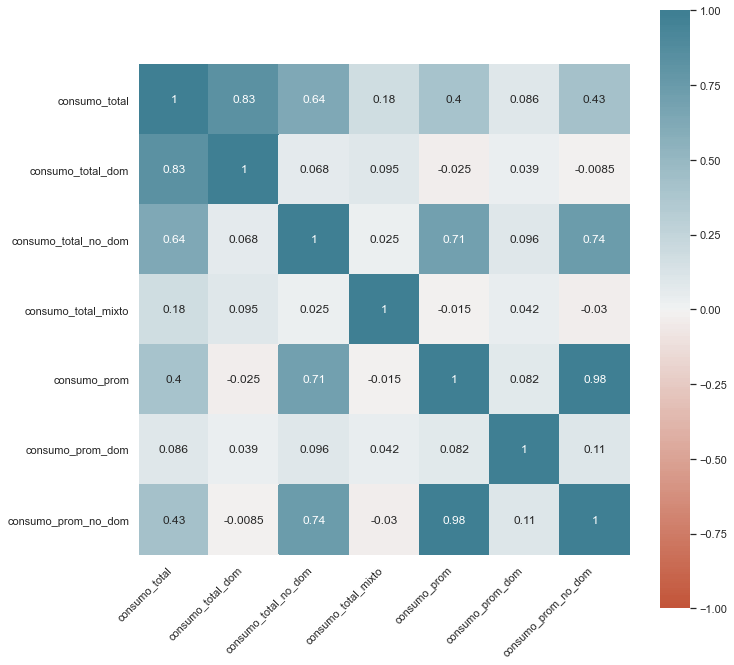

In [150]:
corr = numericas.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

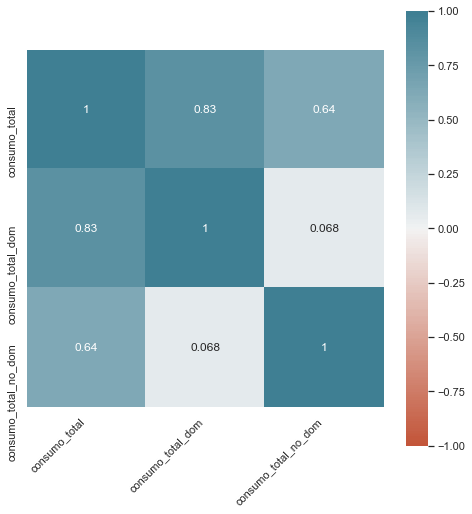

In [157]:
numericas_2=df.iloc[:, 0:3]
corr = numericas_2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [130]:
dom_no = pd.DataFrame(df,
                      columns=['alcaldia',
                               'consumo_total',
                               'consumo_total_dom',
                               'consumo_total_no_dom',
                              'consumo_total_mixto'])\
.groupby(['alcaldia'], as_index=False).sum()\
.sort_values(by=['consumo_total_dom'], ascending=False)\
.melt(id_vars='alcaldia')\

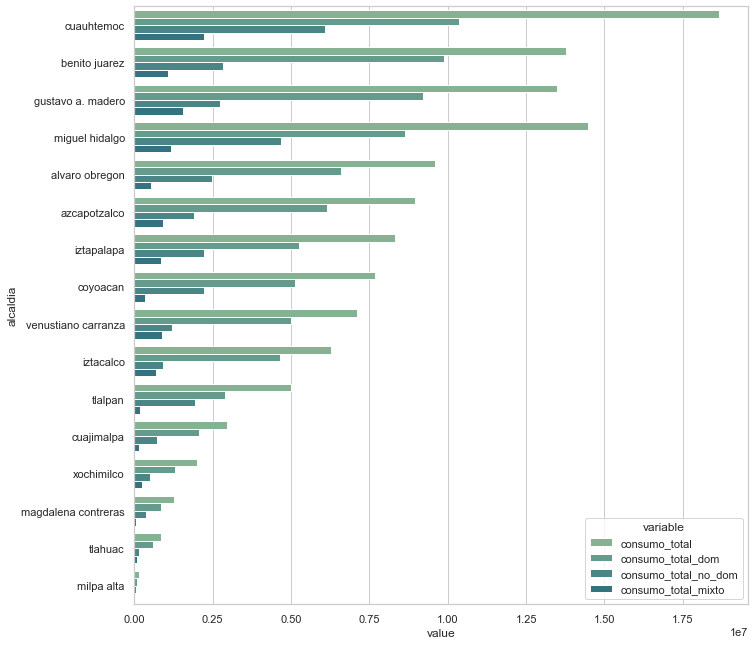

In [181]:
sns.set(style='whitegrid',rc={'figure.figsize':(11,11)},palette='crest')
plt1 = sns.barplot(x="value", y="alcaldia", 
            data=dom_no, hue = 'variable')

In [166]:
ind_alcaldia = pd.DataFrame(df, columns=['alcaldia','consumo_total','indice_des'])\
.groupby(['alcaldia','indice_des'], as_index=False).sum()\
.sort_values(by=['consumo_total'], ascending=False)

In [167]:
ind_alcaldia_tot=ind_alcaldia.pivot(index='alcaldia',
                                    columns='indice_des',
                                    values='consumo_total').fillna(0)

In [168]:
ind_alcaldia_tot=ind_alcaldia_tot.sort_values(by='alto',ascending=False)

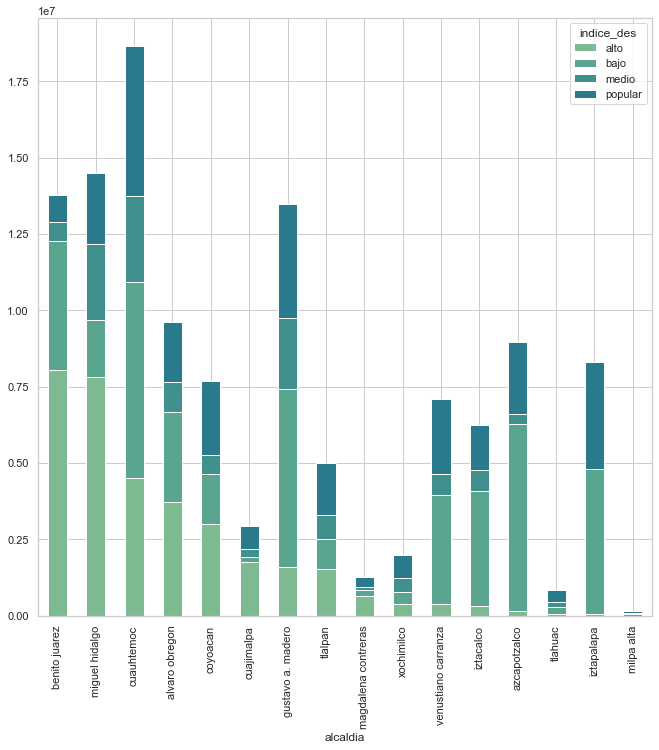

In [182]:
plt2=ind_alcaldia_tot.plot(kind='bar',stacked=True)

In [139]:
ind_alcaldia_prom=ind_alcaldia_tot.apply(lambda x: x*100/sum(x),axis=1)\
.sort_values(by='alto',ascending=False)

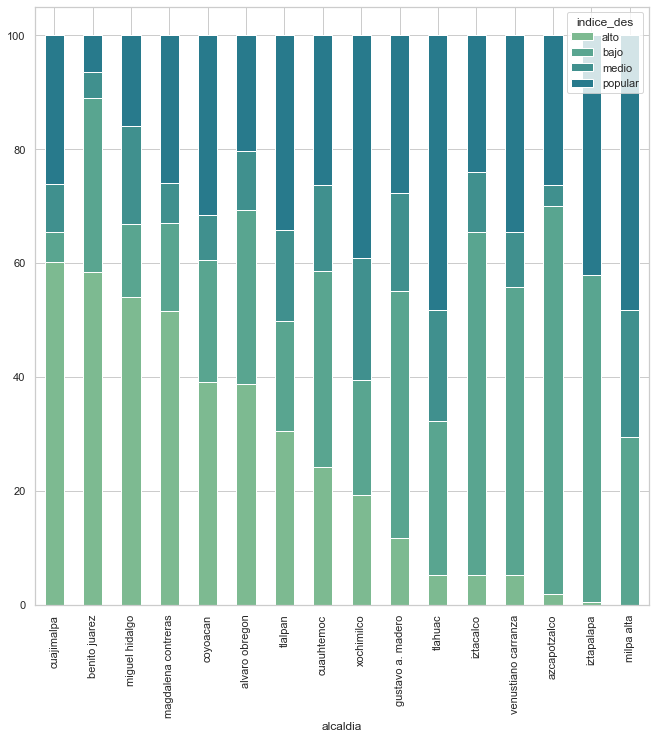

In [183]:
plt3=ind_alcaldia_prom.plot(kind='bar',stacked=True)